In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [2]:
#Data Preprocessing
df = pd.read_csv('goog.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


In [3]:
df.tail()

,Date,Open,High,Low,Close,Volume
56,3/13/2017,844.000000,848.684998,843.250000,845.539978,1149500
57,3/14/2017,843.640015,847.239990,840.799988,845.619995,779900
58,3/15/2017,847.590027,848.630005,840.770020,847.200012,1379600
59,3/16/2017,849.030029,850.849976,846.130005,848.780029,970400
60,3/17/2017,851.609985,853.400024,847.109985,852.119995,1712300


In [4]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [5]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [7]:
#Data Splitting
train_data = scaled_data[:int(len(scaled_data)*0.8)]
test_data = scaled_data[int(len(scaled_data) * 0.8):]


In [8]:
#Data Sequencing
def create_sequences(data,time_steps = 6):
    X = []
    y = []
    
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps,0])
        y.append(data[i+time_steps,0])
    return np.array(X), np.array(y)

In [9]:
X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

In [10]:
#Model Training
model = Sequential()

model.add(LSTM(units = 50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units = 50, return_sequences=False))
model.add(Dropout(rate = 0.2))

model.add(Dense(units = 1))

model.compile(optimizer='adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, epochs = 100, batch_size=4)



Epoch 1/100


C:\Users\shrey\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11/11 [==============================] - 2s 156ms/step - loss: 0.1734
Epoch 2/100
11/11 [==============================] - 3s 286ms/step - loss: 0.0388
Epoch 3/100
11/11 [==============================] - 3s 288ms/step - loss: 0.0410
Epoch 4/100
11/11 [==============================] - 3s 293ms/step - loss: 0.0358
Epoch 5/100
11/11 [==============================] - 3s 286ms/step - loss: 0.0357
Epoch 6/100
11/11 [==============================] - 3s 290ms/step - loss: 0.0337
Epoch 7/100
11/11 [==============================] - 3s 305ms/step - loss: 0.0317
Epoch 8/100
11/11 [==============================] - 3s 301ms/step - loss: 0.0324
Epoch 9/100
11/11 [==============================] - 3s 298ms/step - loss: 0.0302
Epoch 10/100
11/11 [==============================] - 3s 290ms/step - loss: 0.0326
Epoch 11/100
11/11 [==============================] - 3s 285ms/step - loss: 0.0306
Epoch 12/100
11/11 [==============================] - 3s 283ms/step - loss: 0.0327
Epoch 13/100
11/11 [=====

Epoch 100/100
11/11 [==============================] - 1s 118ms/step - loss: 0.0152


In [11]:
# model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
# model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

In [13]:
#model evaluation

y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

y_test = scaler.inverse_transform(y_test.reshape(-1,1))

1/1 [==============================] - 0s 51ms/step


In [14]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print('MAE ',mae)
print('MSE ',mse)
print('RMSE ',rmse)

MAE  14.774274490513383
MSE  222.41194286473598
RMSE  14.913481916197034


In [15]:
#prediction
last_6_days = df['Close'][-6:].values
last_6_days_scaled = scaler.transform(last_6_days.reshape(-1,1))

X_pred = []
X_pred.append(last_6_days_scaled)
X_pred = np.array(X_pred)
X_pred = np.reshape(X_pred,(X_pred.shape[0],X_pred.shape[1],1))

In [16]:
pred_price = model.predict(X_pred)
pred_price = scaler.inverse_transform(pred_price)

print('Predicted price for next day ',pred_price)

1/1 [==============================] - 0s 86ms/step
Predicted price for next day  [[834.97955]]


C:\Users\shrey\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


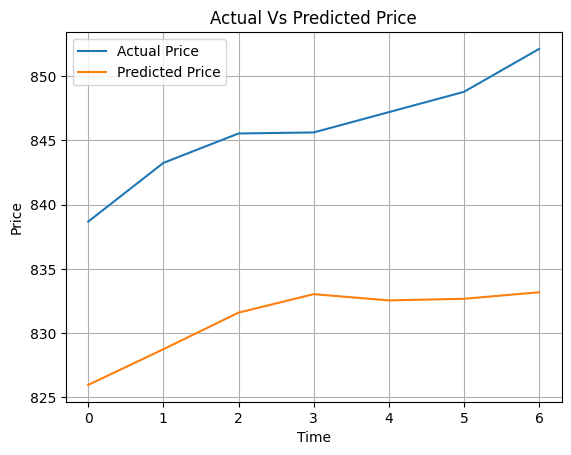

In [17]:
import matplotlib.pyplot as plt

plt.plot(y_test,label='Actual Price')
plt.plot(y_pred, label = 'Predicted Price')

plt.title('Actual Vs Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()